In [2]:
import Rmhmc
import jax.numpy as np
import jax
import importlib
import matplotlib.pyplot as plt

In [44]:
importlib.reload(Rmhmc)

<module 'Rmhmc' from '/home/muhammad/GitHub/Reimmanian-Manifold-HMC/Rmhmc.py'>

In [12]:
# key_rand = jax.random.PRNGKey(0)
# key_rand,subkey = jax.random.split(key_rand)
# H = jax.random.normal(subkey,(10,10))
# key_rand,subkey = jax.random.split(key_rand)
# u = np.ones(H.shape[0])#*np.abs(np.min(np.linalg.eigvalsh(H)))
# Rmhmc.modifiedCholesky(H,u)

In [13]:
f = lambda x: np.linalg.norm(x)
H = jax.jacfwd(jax.jacrev(f))
hval = H(np.ones(10))
np.linalg.eigvals(hval)

DeviceArray([3.1622776e-01+0.j, 5.2154064e-08+0.j, 3.1622776e-01+0.j,
             3.1622776e-01+0.j, 3.1622785e-01+0.j, 3.1622773e-01+0.j,
             3.1622779e-01+0.j, 3.1622773e-01+0.j, 3.1622770e-01+0.j,
             3.1622773e-01+0.j], dtype=complex64)

In [45]:
u = np.array([0.,6])
target = Rmhmc.Target(Rmhmc.funnel_neglog,2,u)

In [46]:
x_init = np.array([0.8,-0.9])
p_init = np.array([0.,1.])
epsilon = 0.001#0.5*target.d**(-0.25)
l = 1.5/epsilon
omega = 100
ham = Rmhmc.Hamiltonian(target,x_init,p_init)
lFrog = Rmhmc.Leapfrog(epsilon,l,omega,target,ham)
hmc = Rmhmc.RMHMC(100,target,x_init,p_init)

In [24]:
lFrog.leap()

(DeviceArray([0.17134821, 0.3025666 ], dtype=float32),
 DeviceArray([-1.3833205,  0.9147947], dtype=float32))

In [56]:
hmc.nsamples = 5000
%time hmc.run()

CPU times: user 50.8 s, sys: 6.7 s, total: 57.5 s
Wall time: 37 s


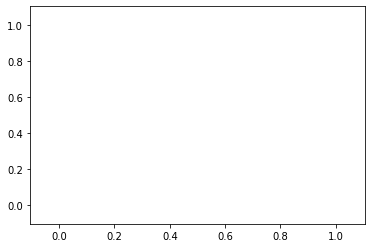

In [58]:
plt.plot(hmc.samples[:,0],hmc.samples[:,1],alpha=0.8,linewidth=0.3)
plt.scatter(hmc.samples[:,0],hmc.samples[:,1],alpha=0.2)